# STA365 Homework 3

### Question 1

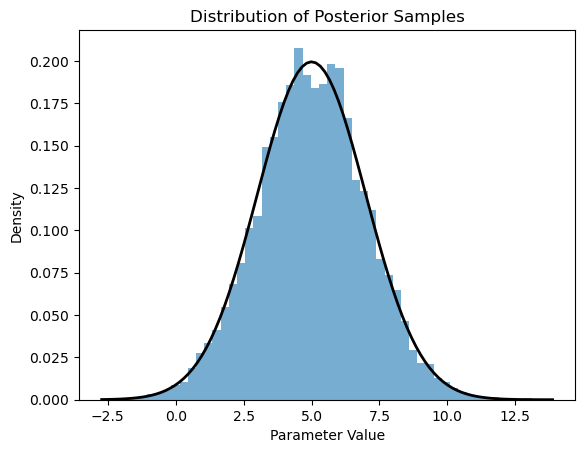

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# set n, m, s for this example
n = 10  # sample size
m = 5   # location/mean
s = 2   # standard deviation

np.random.seed(365)

def gibbs_sampler(n, m, s, num_samples=1000):
    # initialize the chain
    samples = np.zeros(num_samples)
    
    # initial sample
    samples[0] = np.random.normal(m, s)
    
    # Gibbs sampling iterations
    for i in range(1, num_samples):
        # sample the next value from normal distr
        samples[i] = np.random.normal(m, s)
    
    return samples

# Gibbs sampler
samples = gibbs_sampler(n, m, s, num_samples=10000)

# plot the samples
plt.hist(samples, bins=50, density=True, alpha=0.6)

# plot the true normal distr
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, m, s)
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of Posterior Samples"
plt.title(title)
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.show()

In [19]:
"Fit results have mean = %.2f,  std = %.2f" % (m, s)

'Fit results have mean = 5.00,  std = 2.00'

In [13]:
import numpy as np

def credible_interval(samples, percent=95):
    sorted_samples = np.sort(samples)
    
    lower_percentile = np.percentile(sorted_samples, (100 - percent) / 2)
    upper_percentile = np.percentile(sorted_samples, 100 - (100 - percent) / 2)
    
    return lower_percentile, upper_percentile

lower_bound, upper_bound = credible_interval(samples, percent=95)

print(f"95% Credible Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Credible Interval: (1.06, 8.91)


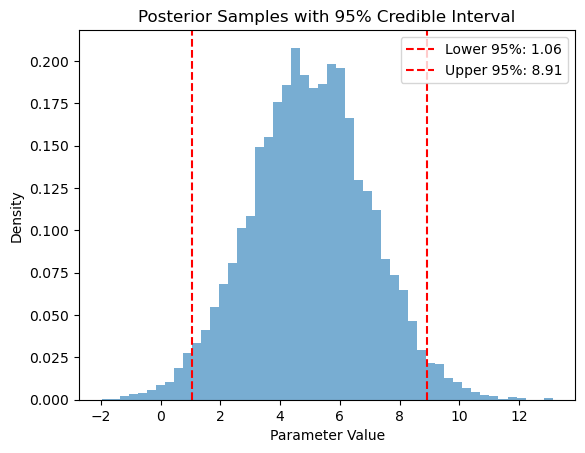

In [26]:
import matplotlib.pyplot as plt

# plot samples
plt.hist(samples, bins=50, density=True, alpha=0.6)

# plot credible interval
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower 95%: {lower_bound:.2f}')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper 95%: {upper_bound:.2f}')

plt.title("Posterior Samples with 95% Credible Interval")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.legend()
plt.show()

Therefore a 95% Credible Interval for the mean of the posterior samples is (1.06, 8.91). This is reasonable as we have set 5 as the mean.

### Question 2

##### Q2 Part 1

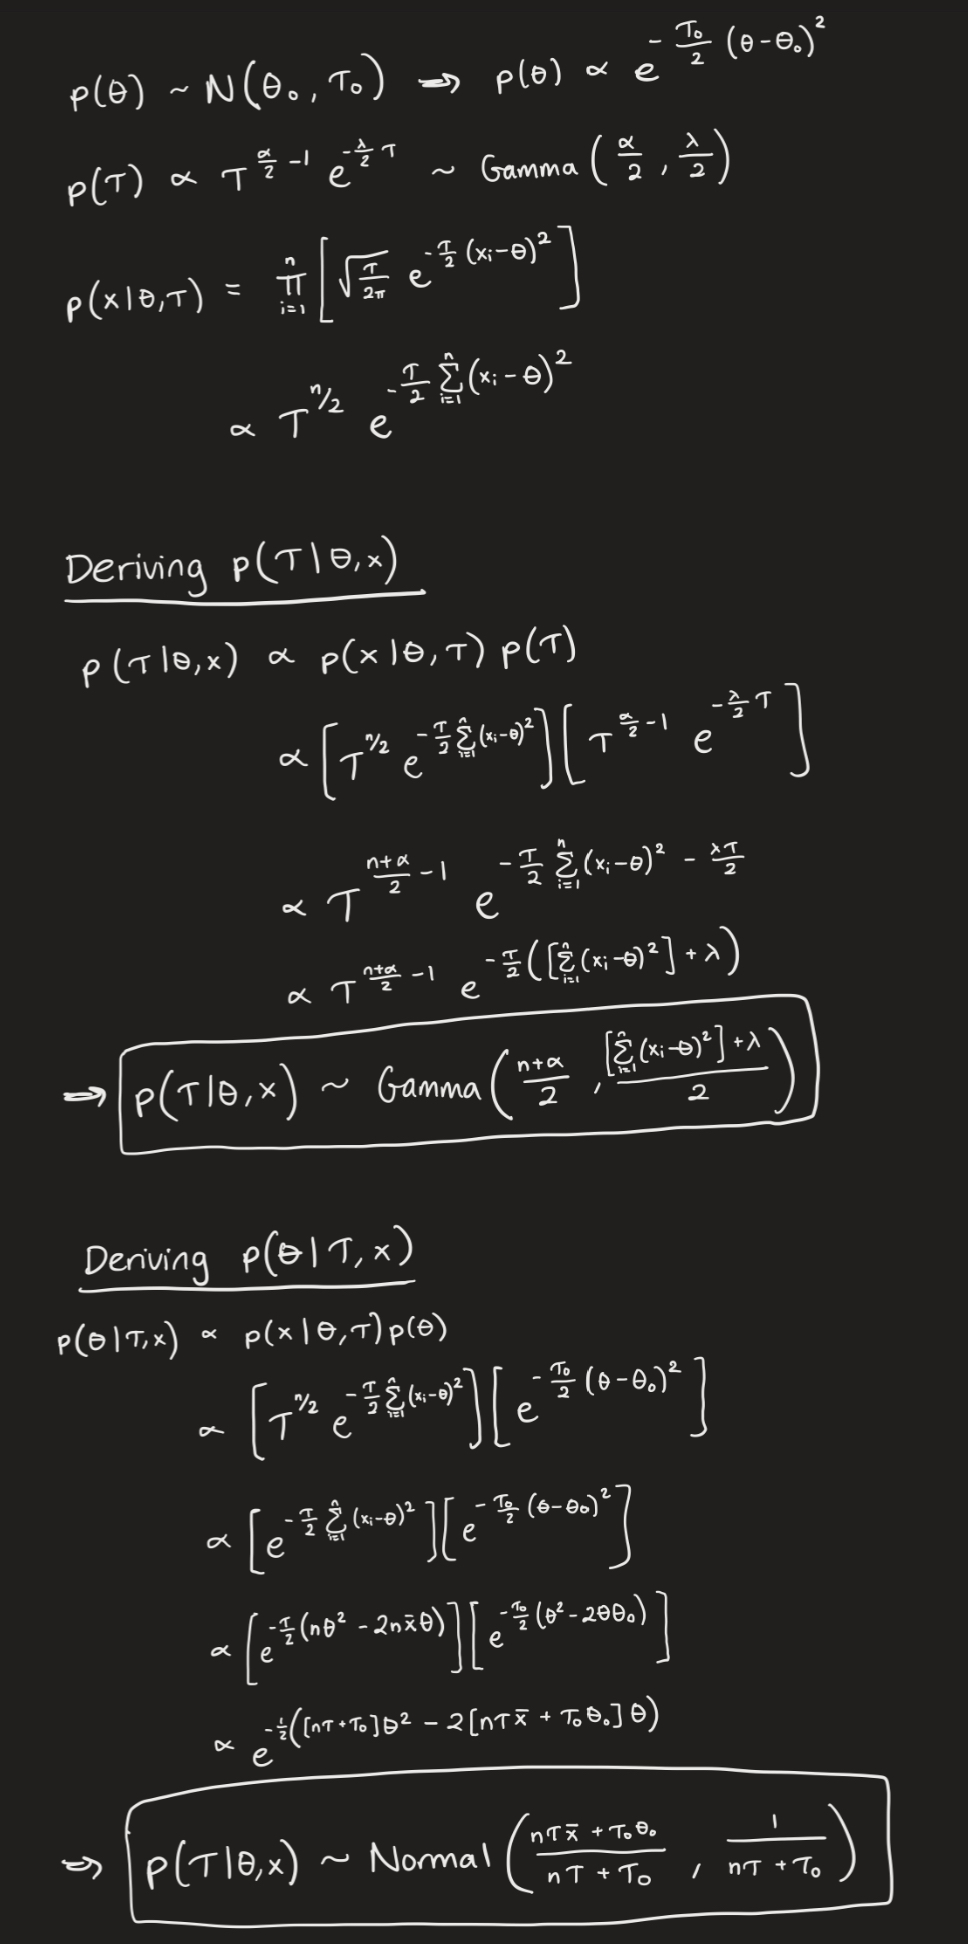

##### Q2 Part 2

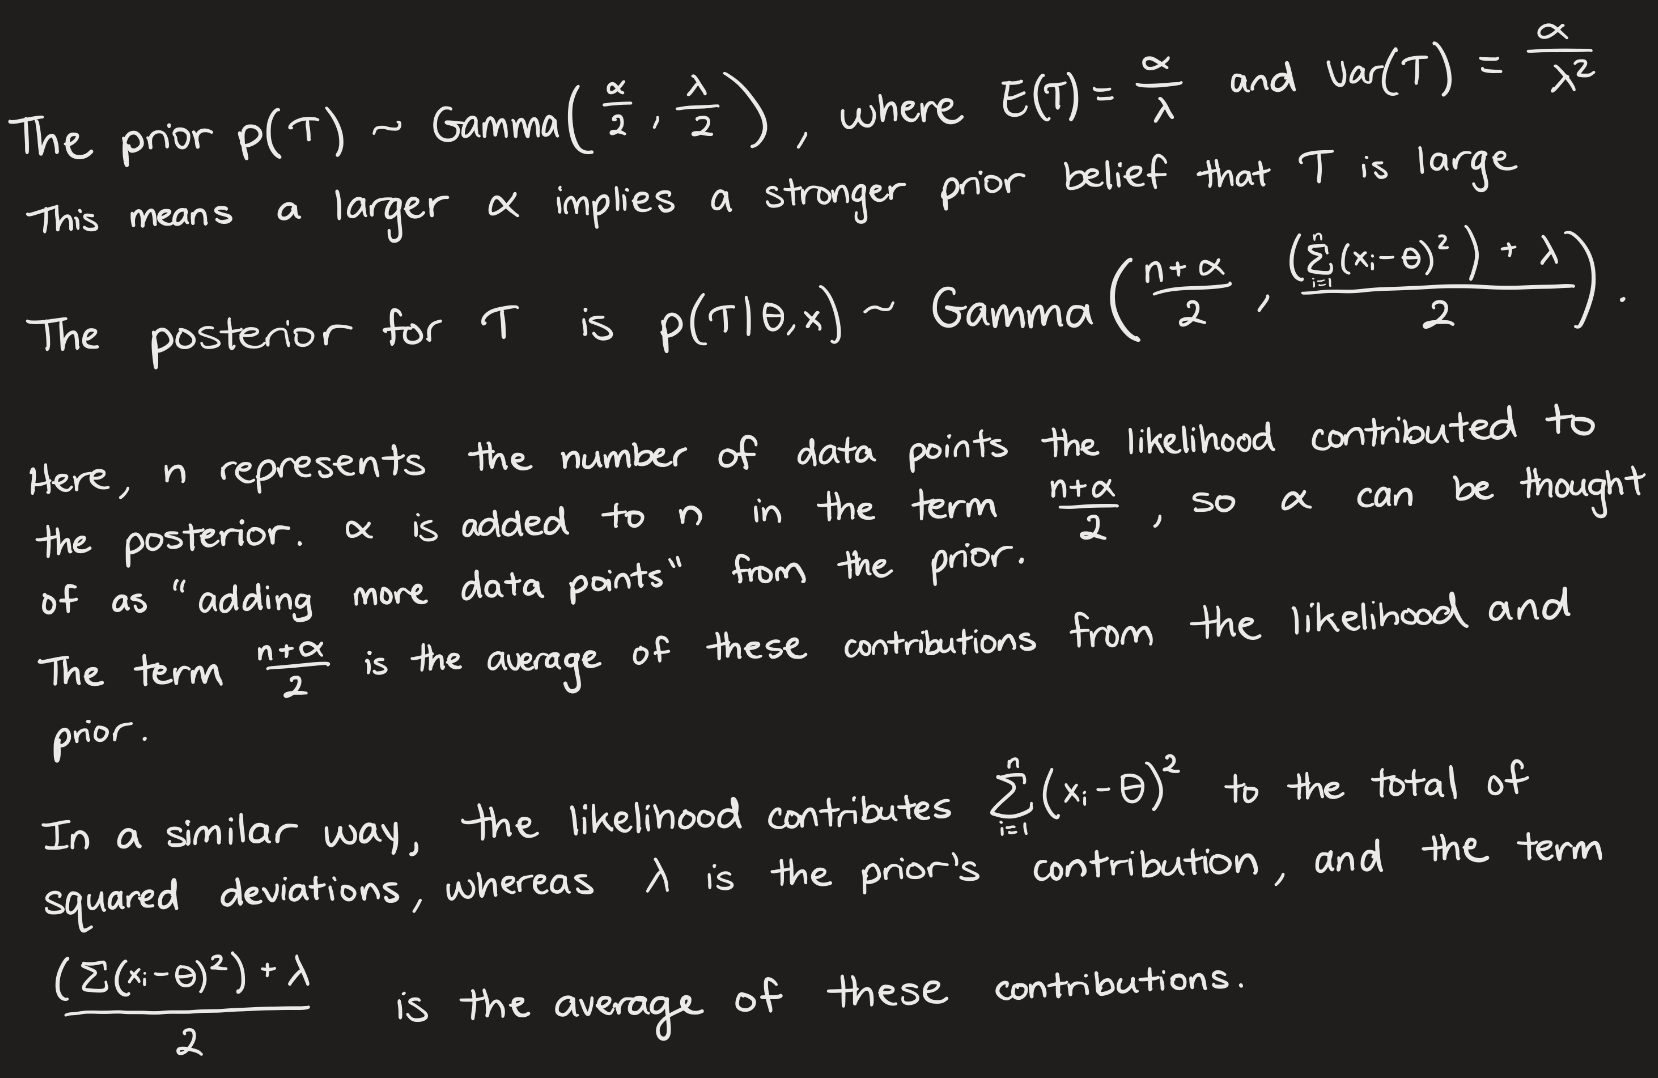

##### Q2 Part 3

Updated Gibbs Sampler:

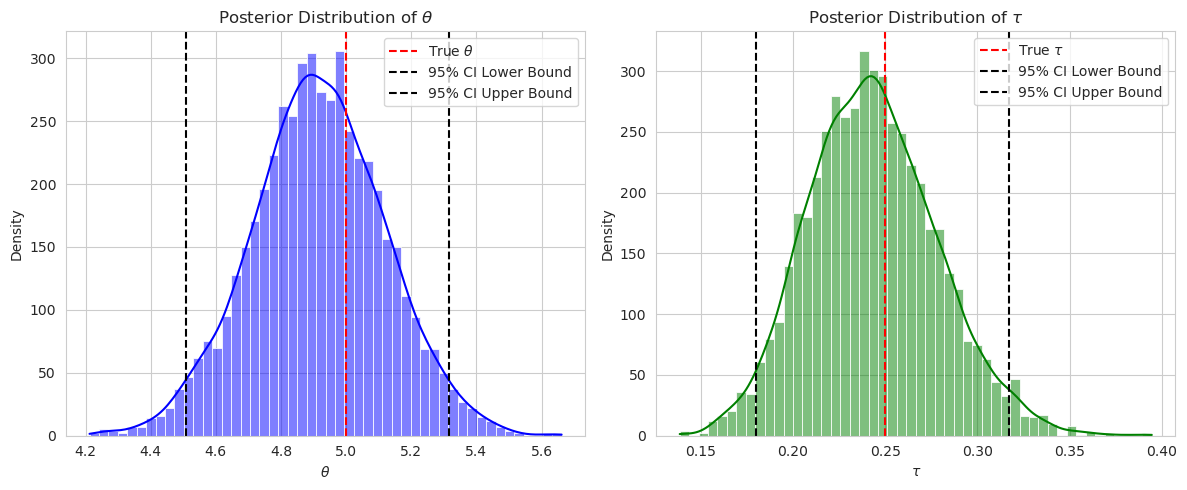

In [31]:
import numpy as np
import scipy.stats as stats

np.random.seed(1006264846)

# given prior parameters
theta_0 = 0  # prior mean for theta
tau_0 = 1    # prior precision for theta
alpha = 2    # shape parameter for Gamma prior
lambda_ = 2  # rate parameter for Gamma prior

# given data
n = 100  # 100 obs
true_theta = 5  # true theta
true_tau = 0.25  # True precision (1/variance)
x = stats.norm(loc=true_theta, scale=1/np.sqrt(true_tau)).rvs(size=n)

num_samples = 5000

theta_samples = np.zeros(num_samples)
tau_samples = np.zeros(num_samples)

# initial values
theta_samples[0] = np.mean(x)
tau_samples[0] = 1/np.var(x)

# Gibbs Sampling
for i in range(1, num_samples):
    # Sample theta | tau, x
    tau_n = tau_0 + n * tau_samples[i-1]
    mu_n = (tau_0 * theta_0 + n * tau_samples[i-1] * np.mean(x)) / tau_n
    theta_samples[i] = stats.norm(loc=mu_n, scale=1/np.sqrt(tau_n)).rvs()
    
    # Sample tau | theta, x
    shape_n = (n + alpha) / 2
    rate_n = (np.sum((x - theta_samples[i])**2) + lambda_) / 2
    tau_samples[i] = stats.gamma(a=shape_n, scale=1/rate_n).rvs()

# the samples in `theta_samples` and `tau_samples` now represent the posterior distributions.



import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# histogram for theta samples
plt.figure(figsize=(12, 5))

theta_ci = np.percentile(theta_samples, [2.5, 97.5])

plt.subplot(1, 2, 1)
sns.histplot(theta_samples, bins=50, kde=True, color="blue")
plt.axvline(true_theta, color='red', linestyle='--', label=r"True $\theta$")
plt.axvline(theta_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(theta_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\theta$")
plt.legend()



# histogram for tau samples

tau_ci = np.percentile(tau_samples, [2.5, 97.5])

plt.subplot(1, 2, 2)
sns.histplot(tau_samples, bins=50, kde=True, color="green")
plt.axvline(true_tau, color='red', linestyle='--', label=r"True $\tau$")
plt.axvline(tau_ci[0], color='black', linestyle='--', label="95% CI Lower Bound")
plt.axvline(tau_ci[1], color='black', linestyle='--', label="95% CI Upper Bound")
plt.xlabel(r"$\tau$")
plt.ylabel("Density")
plt.title(r"Posterior Distribution of $\tau$")
plt.legend()

plt.tight_layout()
plt.show()

##### Q2 Part 4

###### Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.

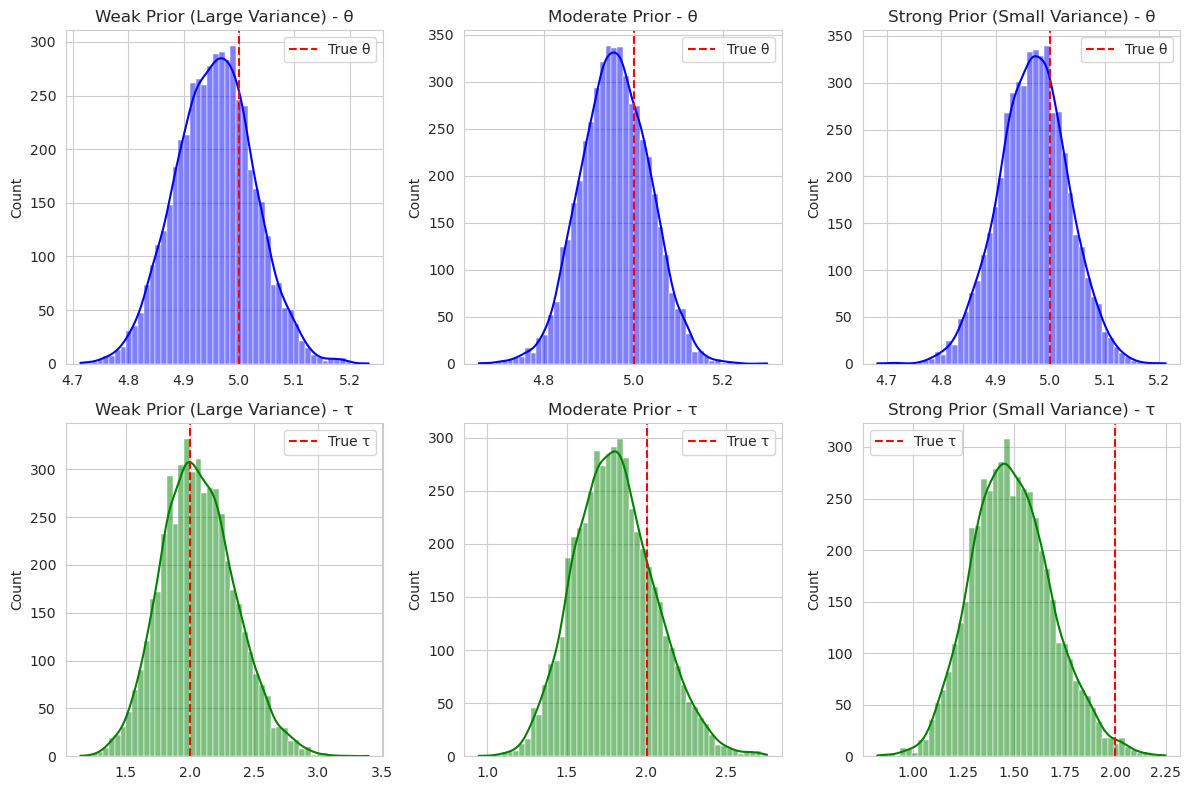

In [33]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(365)

def gibbs_sampler(theta_0, tau_0, alpha, lambda_, num_samples=5000, n=100):
    true_theta = 5
    true_tau = 2 
    x = stats.norm(loc=true_theta, scale=1/np.sqrt(true_tau)).rvs(size=n)

    theta_samples = np.zeros(num_samples)
    tau_samples = np.zeros(num_samples)

    theta_samples[0] = np.mean(x)
    tau_samples[0] = 1/np.var(x)

    for i in range(1, num_samples):
        # sample theta | tau, x
        tau_n = tau_0 + n * tau_samples[i-1]
        mu_n = (tau_0 * theta_0 + n * tau_samples[i-1] * np.mean(x)) / tau_n
        theta_samples[i] = stats.norm(loc=mu_n, scale=1/np.sqrt(tau_n)).rvs()
        
        # sample tau | theta, x
        shape_n = (n + alpha) / 2
        rate_n = (np.sum((x - theta_samples[i])**2) + lambda_) / 2
        tau_samples[i] = stats.gamma(a=shape_n, scale=1/rate_n).rvs()
    
    return theta_samples, tau_samples

# different prior settings for: theta_0, tau_0, alpha, lambda_
prior_settings = {
    "Weak Prior (Large Variance)": (0, 0.01, 2, 2),
    "Moderate Prior": (0, 1, 5, 5),
    "Strong Prior (Small Variance)": (5, 100, 10, 10)
}

# Gibbs sampler for the diff priors
results = {name: gibbs_sampler(*params) for name, params in prior_settings.items()}

# visualizations
plt.figure(figsize=(12, 8))

for i, (name, (theta_samples, tau_samples)) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    sns.histplot(theta_samples, bins=50, kde=True, color="blue")
    plt.axvline(5, color='red', linestyle='--', label="True θ")
    plt.title(f"{name} - θ")
    plt.legend()

    plt.subplot(2, 3, i+4)
    sns.histplot(tau_samples, bins=50, kde=True, color="green")
    plt.axvline(2, color='red', linestyle='--', label="True τ")
    plt.title(f"{name} - τ")
    plt.legend()

plt.tight_layout()
plt.show()

The weak prior example represents what would happen with a small $\alpha$ and $\lambda$, with large variance. A weak prior means a lot more weight is put on the likelihood, and the observed data is what drives and dominates the posterior. Using a weak prior would make sense when you do not have a strong prior belief about the parameter of interest and want to have the data mostly speak for itself. In this example, since the likelihood holds more weight than the prior, the posterior samples converge around the true values of $\theta$ and $\tau$.

The strong prior example represents what would happen with a larger $\alpha$ and $\lambda$, with small variance. A strong prior means that the posterior is less dependent on the data, and is driven by the prior distribution. Using a strong prior would make sense when you have a strong prior belief about the parameter of interest and wish to have to posterior rely on the prior distribution more than the data. In this example, since the prior holds more weight than the likelihood, the posterior samples more closely follow the prior distribution than the distribution of the likelihood data.

Lastly, the moderate prior example has a posterior which balances between the prior and the likelihood, which is useful when you want the prior and likelihood to contribute approximately equal weight to the posterior.

### Question 3

###### Option (B)

Recall if the prior is a proper distribution, then the posterior will also be a proper distribution. Since the posterior is equal to the joint divided by the normalizing constant, this means the posterior is always proportional to the joint. In Bayesian statistics, we care about the shape of the distribution of samples and not what it's scaled by (the normalizing constant), so in Bayesian stats, having the posterior is always sufficient (as no matter the normalizing constant, the overall shape of the data will always be the same, so the more time-consuming calculations to calculate the normalizing constant are very unnecessary for our purposes).